In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random
import warnings
warnings.filterwarnings('ignore')
# from points_io import save_points_as_pdb
# pd.options.mode.copy_on_write = True

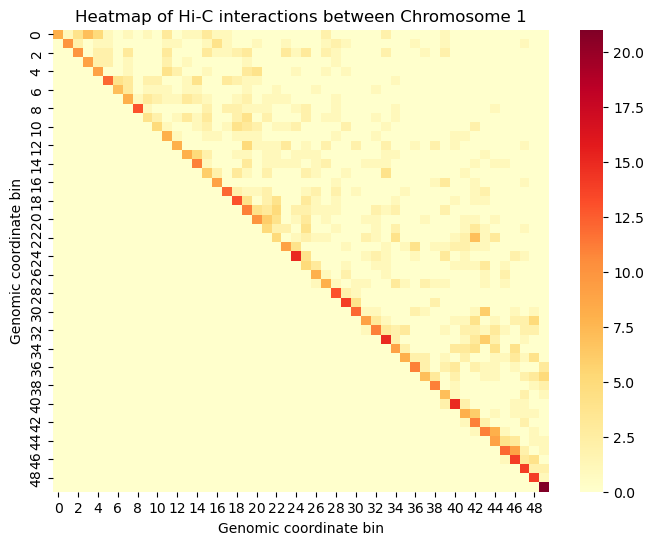

In [18]:
data = pd.read_table('data/GSM1173493_cell-1.txt')

chrom1_data = data[((data["chrom1"] == '15') & (data["chrom2"] == '15'))]
chrom1_data['coord1_bin'] = pd.cut(chrom1_data['coord1'], bins=50, labels=False)
chrom1_data['coord2_bin'] = pd.cut(chrom1_data['coord2'], bins=50, labels=False)



heatmap_data_chrom1 = chrom1_data.pivot_table(index='coord1_bin', columns='coord2_bin', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_chrom1, cmap='YlOrRd')
plt.title('Heatmap of Hi-C interactions between Chromosome 1')
plt.xlabel('Genomic coordinate bin')
plt.ylabel('Genomic coordinate bin')
plt.show()

## Checkpoint 2

In [19]:
data = pd.read_table('data/GSM1173493_cell-1.txt')

chrom1_data = data[((data["chrom1"] == '15') & (data["chrom2"] == '15'))]
chrom1_data['coord1_bin'] = pd.cut(chrom1_data['coord1'], bins=150, labels=False)
chrom1_data['coord2_bin'] = pd.cut(chrom1_data['coord2'], bins=150, labels=False)



heatmap_data_chrom1 = chrom1_data.pivot_table(index='coord1_bin', columns='coord2_bin', aggfunc='size', fill_value=0)
coord1_nonzero_indices = []
coord2_nonzero_indices = []

for coord1_index in heatmap_data_chrom1.index:
    for coord2_index in heatmap_data_chrom1.columns:
        if heatmap_data_chrom1.loc[coord1_index, coord2_index] > 0:
            coord1_nonzero_indices.append(coord1_index)
            coord2_nonzero_indices.append(coord2_index)

In [20]:
def createGraph(coord1, coord2):
    G = nx.cubical_graph()
    for i in range(len(coord1)):
        if coord1[i] == coord2[i]:
            continue
        G.add_edge(coord1[i], coord2[i])
    pos = nx.spring_layout(G, dim=3)
    return G, pos

In [21]:
G, pos = createGraph(coord1_nonzero_indices, coord2_nonzero_indices)

In [47]:
def random_walk(G, pos,n=1000):
    matrix = np.empty((0, 3))
    node = random.choice(list(G.nodes()))
    coord = pos[node]
    matrix = np.vstack([matrix, np.array(coord)])
    for _ in range(n):
        node = random.choice(list(G.neighbors(node)))
        coord = pos[node]
        matrix = np.vstack([matrix, np.array(coord)])
    save_points_as_pdb(matrix, pdb_file_name='points.pdb')

    

In [ ]:
random_walk(G, pos)

In [68]:
def generate_self_avoiding_walk(max_steps, grid):

    walk = [(0, 0, 0)]
    visited = set([(0, 0, 0)])
    
    moves = [(0, 0, 1), (0, 0, -1), (0, 1, 0), (0, -1, 0), (1, 0, 0), (-1, 0, 0)]
    
    for _ in range(max_steps):
        dx, dy, dz = random.choice(moves)
        new_pos = (walk[-1][0] + dx, walk[-1][1] + dy, walk[-1][2] + dz)
        
        if any(abs(i) > grid for i in new_pos):
            continue
        
        if new_pos not in visited:
            walk.append(new_pos)
        else:
            continue        
    return walk

In [69]:
generate_self_avoiding_walk(10, 7)

[(0, 0, 0),
 (0, 0, -1),
 (0, -1, -1),
 (0, -1, -2),
 (0, -1, -3),
 (1, -1, -3),
 (2, -1, -3),
 (2, -1, -2),
 (3, -1, -2),
 (4, -1, -2),
 (5, -1, -2)]